In [44]:
import csv
import collections
from dateutil.parser import parser
import datetime
import csv
%matplotlib inline
import matplotlib.pyplot as plt

import numpy
import pandas as pd
import seaborn as sns

In [4]:
with open('turnstile_160507.txt') as f:
    turnstiles1 = pd.read_csv(f)
with open('turnstile_160514.txt') as f:
    turnstiles2 = pd.read_csv(f)
with open('turnstile_160521.txt') as f:
    turnstiles3 = pd.read_csv(f)
with open('turnstile_160528.txt') as f:
    turnstiles4 = pd.read_csv(f)

turnstile_df = pd.concat([turnstiles1, turnstiles2, turnstiles3, turnstiles4], ignore_index = True)

In [5]:
turnstile_df.columns = turnstile_df.columns.str.strip()
turnstile_df['DATETIME'] = turnstile_df['DATE'] + ' ' + turnstile_df['TIME']
turnstile_df['DATETIME'] = turnstile_df['DATETIME'].apply(parser)


In [6]:
#THIS STEP TAKES FOREVER!!!!!
m =turnstile_df['DATE']

turnstile_df['dayofweek'] = pd.to_datetime(m).dt.dayofweek


In [7]:
turnstile_df['STATIONLINE'] = turnstile_df['STATION'] + turnstile_df['LINENAME']

In [8]:
turnstile_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,STATIONLINE
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,<dateutil.parser.parser object at 0x7fa744c2fbd0>,5,59 STNQR456
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,<dateutil.parser.parser object at 0x7fa744c2fb50>,5,59 STNQR456
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,<dateutil.parser.parser object at 0x7fa744c2fcd0>,5,59 STNQR456
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,<dateutil.parser.parser object at 0x7fa744c2ff10>,5,59 STNQR456
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,<dateutil.parser.parser object at 0x7fa744c2ff50>,5,59 STNQR456
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802,1910254,<dateutil.parser.parser object at 0x7fa744c2ff90>,5,59 STNQR456
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974,1910328,<dateutil.parser.parser object at 0x7fa744c2fd90>,6,59 STNQR456
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996,1910333,<dateutil.parser.parser object at 0x7fa752ec8c90>,6,59 STNQR456
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021,1910358,<dateutil.parser.parser object at 0x7fa744c3c090>,6,59 STNQR456
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113,1910427,<dateutil.parser.parser object at 0x7fa744c3c050>,6,59 STNQR456


In [9]:
test =turnstile_df.groupby(['STATIONLINE', 'C/A', 'UNIT', 'SCP'])

In [10]:
turnstile_df['net_in'] = test['ENTRIES'].transform(pd.Series.diff)
turnstile_df['net_out'] = test['EXITS'].transform(pd.Series.diff)

In [11]:
foo = turnstile_df['net_in']
print len(foo[foo>5000])
print len(foo[foo<-5000])

96
105


In [12]:
turnstile_df[turnstile_df['net_in']>5000] = numpy.nan
turnstile_df[turnstile_df['net_in']<-5000] = numpy.nan
turnstile_df['net_in']=numpy.abs(turnstile_df['net_in'])
turnstile_df[turnstile_df['net_out']>5000] = numpy.nan
turnstile_df[turnstile_df['net_out']<-5000] = numpy.nan
turnstile_df['net_out']=numpy.abs(turnstile_df['net_out'])
turnstile_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,STATIONLINE,net_in,net_out
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941.0,1909983.0,<dateutil.parser.parser object at 0x7fa744c2fbd0>,5.0,59 STNQR456,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991.0,1909993.0,<dateutil.parser.parser object at 0x7fa744c2fb50>,5.0,59 STNQR456,50.0,10.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014.0,1910024.0,<dateutil.parser.parser object at 0x7fa744c2fcd0>,5.0,59 STNQR456,23.0,31.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158.0,1910134.0,<dateutil.parser.parser object at 0x7fa744c2ff10>,5.0,59 STNQR456,144.0,110.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454.0,1910197.0,<dateutil.parser.parser object at 0x7fa744c2ff50>,5.0,59 STNQR456,296.0,63.0
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802.0,1910254.0,<dateutil.parser.parser object at 0x7fa744c2ff90>,5.0,59 STNQR456,348.0,57.0
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974.0,1910328.0,<dateutil.parser.parser object at 0x7fa744c2fd90>,6.0,59 STNQR456,172.0,74.0
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996.0,1910333.0,<dateutil.parser.parser object at 0x7fa752ec8c90>,6.0,59 STNQR456,22.0,5.0
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021.0,1910358.0,<dateutil.parser.parser object at 0x7fa744c3c090>,6.0,59 STNQR456,25.0,25.0
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113.0,1910427.0,<dateutil.parser.parser object at 0x7fa744c3c050>,6.0,59 STNQR456,92.0,69.0


In [13]:
turnstile_df['net_sum']= turnstile_df['net_in']+ turnstile_df['net_out']

In [14]:
turnstile_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,STATIONLINE,net_in,net_out,net_sum
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941.0,1909983.0,<dateutil.parser.parser object at 0x7fa744c2fbd0>,5.0,59 STNQR456,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991.0,1909993.0,<dateutil.parser.parser object at 0x7fa744c2fb50>,5.0,59 STNQR456,50.0,10.0,60.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014.0,1910024.0,<dateutil.parser.parser object at 0x7fa744c2fcd0>,5.0,59 STNQR456,23.0,31.0,54.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158.0,1910134.0,<dateutil.parser.parser object at 0x7fa744c2ff10>,5.0,59 STNQR456,144.0,110.0,254.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454.0,1910197.0,<dateutil.parser.parser object at 0x7fa744c2ff50>,5.0,59 STNQR456,296.0,63.0,359.0
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802.0,1910254.0,<dateutil.parser.parser object at 0x7fa744c2ff90>,5.0,59 STNQR456,348.0,57.0,405.0
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974.0,1910328.0,<dateutil.parser.parser object at 0x7fa744c2fd90>,6.0,59 STNQR456,172.0,74.0,246.0
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996.0,1910333.0,<dateutil.parser.parser object at 0x7fa752ec8c90>,6.0,59 STNQR456,22.0,5.0,27.0
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021.0,1910358.0,<dateutil.parser.parser object at 0x7fa744c3c090>,6.0,59 STNQR456,25.0,25.0,50.0
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113.0,1910427.0,<dateutil.parser.parser object at 0x7fa744c3c050>,6.0,59 STNQR456,92.0,69.0,161.0


In [15]:
daily_entry = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_in'].sum()
daily_exit = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_out'].sum()
daily_total = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_sum'].sum()

In [16]:
daily_entry = daily_entry.reset_index()
daily_exit = daily_exit.reset_index()
daily_total = daily_total.reset_index()

In [17]:
total_entry = turnstile_df.groupby(['STATIONLINE'])['net_in'].sum()
total_exit = turnstile_df.groupby(['STATIONLINE'])['net_out'].sum()

In [18]:
total = total_entry.add(total_exit)
summary = pd.concat([total_entry, total_exit, total], axis=1)

In [19]:
summary.columns = ['total_entry', 'total_exit', 'total_traffic']

In [20]:
summary = summary.reset_index()

In [21]:
topten = summary.sort_values(by = ['total_traffic'], ascending = False).head(10)

In [22]:
toptwenty = summary.sort_values(by = ['total_traffic'], ascending = False).head(20)

In [23]:
list(topten['STATIONLINE'])

['GRD CNTRL-42 ST4567S',
 '34 ST-HERALD SQBDFMNQR',
 'TIMES SQ-42 ST1237ACENQRS',
 '42 ST-PORT AUTHACENQRS1237',
 '34 ST-PENN STAACE',
 '14 ST-UNION SQLNQR456',
 '86 ST456',
 '47-50 STS ROCKBDFM',
 'FLUSHING-MAIN7',
 '59 ST COLUMBUSABCD1']

In [46]:
topstation_name = ['GRD CNTRL-42 ST (4567S)',
 '34 ST-HERALD SQ (BDFMNQR)',
 'TIMES SQ-42 ST (1237ACENQRS)',
 '42 ST-PORT AUTH (ACENQRS1237)',
 '34 ST-PENN STA (ACE)',
 '14 ST-UNION SQ (LNQR456)',
 '86 ST (456)',
 '47-50 STS ROCK (BDFM)',
 'FLUSHING-MAIN (7)',
 '59 ST COLUMBUS (ABCD1)']

In [47]:
topstation = list(topten['STATIONLINE'])

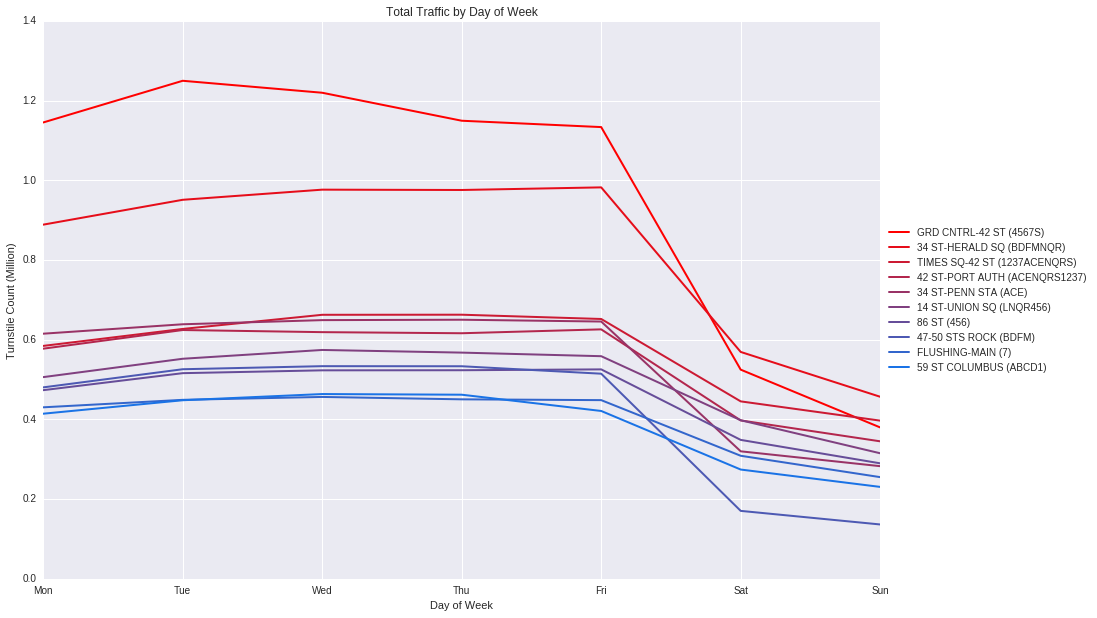

In [48]:
daily_total
fig1 = plt.figure(dpi = 600, figsize = (15, 10))
ax1  = fig1.add_subplot(111)
clr = numpy.arange(0, 1.1, 0.1)

for i in topstation:
    station_total = daily_total[daily_total['STATIONLINE']==i]
    x = numpy.array(station_total['dayofweek'])
    y = numpy.array(station_total['net_sum'])
    index = topstation.index(i)
    c = (clr[10-index], clr[index]/2, clr[index], 1)
    ax1.plot(x,y, label = topstation_name[index], color = c, linewidth = 2.0)
ax1.set_xlabel('Day of Week')
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax1.set_yticklabels(numpy.arange(0.0, 1.6, 0.2))
ax1.set_ylabel('Turnstile Count (Million)')
ax1.set_title('Total Traffic by Day of Week')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


In [49]:
t_en = numpy.array(topten['total_entry'])[::-1]
t = numpy.array(topten['total_traffic'])[::-1]

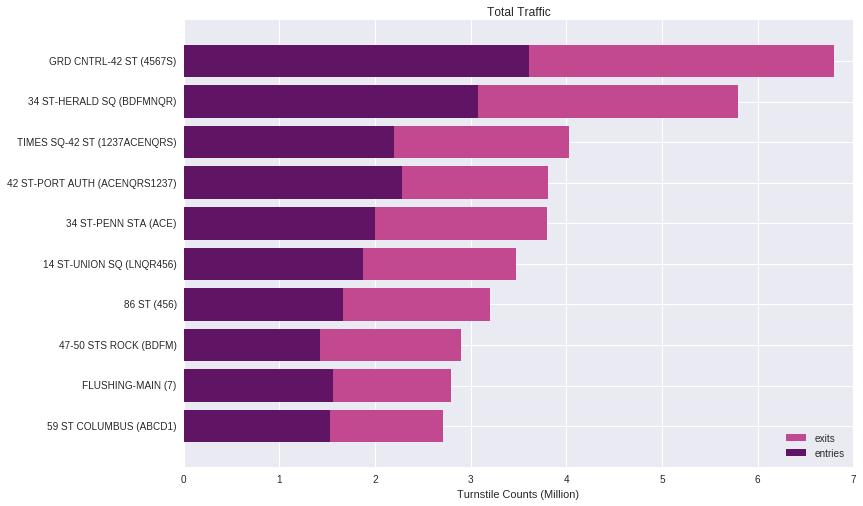

In [50]:
fig2 = plt.figure(dpi = 400, figsize = (12, 8))
ax2  = fig2.add_subplot(111)
ax2.barh(range(0, 10), t, color = '#C24890', label = 'exits', align = 'center', edgecolor = "none")
ax2.barh(range(0, 10), t_en, color = '#5F1564', label = 'entries', align = 'center', edgecolor = "none")
ax2.set_yticks(range(0,10))
ax2.set_yticklabels(topstation_name[::-1])
ax2.set_xlabel('Turnstile Counts (Million)')
ax2.set_xticklabels(range(0,8))
plt.ylim(-1, 10)
plt.title('Total Traffic')
plt.legend(loc = 'best');
fig2.savefig('Fig1.png')

In [51]:
weekday_data = turnstile_df[turnstile_df['dayofweek']<5]

In [52]:
weekday_data['st2']=weekday_data['STATIONLINE']

/home/neokt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [53]:
weekday_data_to = weekday_data[weekday_data['st2'].isin(topstation)]

In [54]:
m1 = weekday_data_to['STATIONLINE']
m2 = weekday_data_to['TIME']
m3 = weekday_data_to['net_sum']

In [55]:
m_new = pd.concat([m1, m2, m3], axis=1)

In [56]:
hslot = []
h= []
for i in m_new['TIME']:
    i = str(i)
    hour = int(i[:2])
    if hour == 0:
        hslot.append(6)
    elif hour > 0 and hour <= 4:
        hslot.append(1)
    elif hour <=8:
        hslot.append(2)
    elif hour <=12:
        hslot.append(3)
    elif hour <=16:
        hslot.append(4)
    elif hour<=20:
        hslot.append(5)
    else:
        hslot.append(6)


In [57]:
m_new['hslot'] = hslot

In [58]:
stationbyhour = m_new.groupby(['STATIONLINE', 'hslot'])['net_sum'].sum()

In [59]:
stationbyhour= stationbyhour.reset_index()

In [60]:
stationbyhour

,STATIONLINE,hslot,net_sum
0,14 ST-UNION SQLNQR456,1,254734.0
1,14 ST-UNION SQLNQR456,2,23128.0
2,14 ST-UNION SQLNQR456,3,368218.0
3,14 ST-UNION SQLNQR456,4,554757.0
4,14 ST-UNION SQLNQR456,5,690748.0
5,14 ST-UNION SQLNQR456,6,866657.0
6,34 ST-HERALD SQBDFMNQR,1,60474.0
7,34 ST-HERALD SQBDFMNQR,2,339216.0
8,34 ST-HERALD SQBDFMNQR,3,1212076.0
9,34 ST-HERALD SQBDFMNQR,4,934056.0


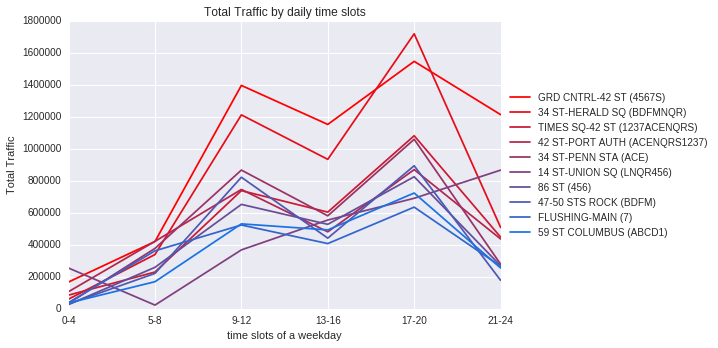

In [61]:
clr = numpy.arange(0, 1.1, 0.1)

fig1 = plt.figure()
ax1 = fig1.add_axes([0, 0, 1, 1])
for i in topstation:
    station_hour = stationbyhour[stationbyhour['STATIONLINE']==i]
    x = numpy.array(station_hour['hslot'])
    y = numpy.array(station_hour['net_sum'])
    index = topstation.index(i)
    c = (clr[10-index], clr[index]/2, clr[index], 1)
    ax1.plot(x,y, label = topstation_name[index], color = c)
ax1.set_xlabel('time slots of a weekday')
ax1.set_xticklabels(['0-4', '5-8', '9-12', '13-16', '17-20', '21-24'])
ax1.set_ylabel('Total Traffic')
ax1.set_title('Total Traffic by daily time slots')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Ting

In [62]:
stationbyhour['Time Slot (Hours)'] = stationbyhour['hslot']
stationbyhour['Station'] = stationbyhour['STATIONLINE']
stationbyhour['Sum'] = stationbyhour['net_sum']/1000000

In [190]:
stationbyhour

,STATIONLINE,hslot,net_sum,Time Slot (Hours),Station,Sum
0,14 ST-UNION SQLNQR456,1,254734.0,1,14 ST-UNION SQLNQR456,0.254734
1,14 ST-UNION SQLNQR456,2,23128.0,2,14 ST-UNION SQLNQR456,0.023128
2,14 ST-UNION SQLNQR456,3,368218.0,3,14 ST-UNION SQLNQR456,0.368218
3,14 ST-UNION SQLNQR456,4,554757.0,4,14 ST-UNION SQLNQR456,0.554757
4,14 ST-UNION SQLNQR456,5,690748.0,5,14 ST-UNION SQLNQR456,0.690748
5,14 ST-UNION SQLNQR456,6,866657.0,6,14 ST-UNION SQLNQR456,0.866657
6,34 ST-HERALD SQBDFMNQR,1,60474.0,1,34 ST-HERALD SQBDFMNQR,0.060474
7,34 ST-HERALD SQBDFMNQR,2,339216.0,2,34 ST-HERALD SQBDFMNQR,0.339216
8,34 ST-HERALD SQBDFMNQR,3,1212076.0,3,34 ST-HERALD SQBDFMNQR,1.212076
9,34 ST-HERALD SQBDFMNQR,4,934056.0,4,34 ST-HERALD SQBDFMNQR,0.934056


In [68]:
stationbyhour_piv = stationbyhour.pivot_table(values = 'Sum', index = 'Station', columns = 'Time Slot (Hours)')

In [167]:
stationbyhour_piv

Time Slot (Hours),1,2,3,4,5,6
Station,,,,,,
14 ST-UNION SQLNQR456,0.254734,0.023128,0.368218,0.554757,0.690748,0.866657
34 ST-HERALD SQBDFMNQR,0.060474,0.339216,1.212076,0.934056,1.718597,0.508963
34 ST-PENN STAACE,0.034187,0.377438,0.866930,0.581123,1.059333,0.279045
42 ST-PORT AUTHACENQRS1237,0.107130,0.421666,0.745890,0.481046,0.869999,0.436565
47-50 STS ROCKBDFM,0.030047,0.221315,0.822184,0.441575,0.894134,0.178187
59 ST COLUMBUSABCD1,0.036664,0.169320,0.530802,0.493108,0.723519,0.255296
86 ST456,0.026505,0.259197,0.652561,0.527954,0.825421,0.269318
FLUSHING-MAIN7,0.038964,0.362307,0.523805,0.407708,0.635392,0.265886
GRD CNTRL-42 ST4567S,0.167507,0.420455,1.396085,1.152366,1.546488,1.213653


In [194]:
stationbyhour_piv['Total'] = stationbyhour_piv[1] + stationbyhour_piv[2] + stationbyhour_piv[3] + stationbyhour_piv[4] + stationbyhour_piv[5] + stationbyhour_piv[6]

In [196]:
stationbyhour_piv = stationbyhour_piv.sort_values(['Total'], ascending = False)

In [201]:
stationbyhour_piv = stationbyhour_piv.drop('Total',1)

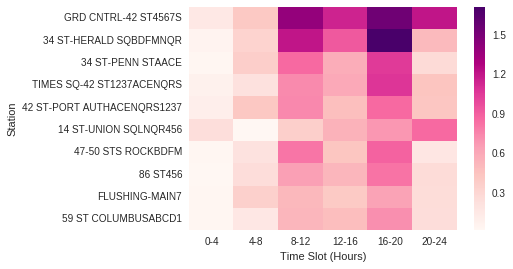

In [205]:
heatmap = sns.heatmap(stationbyhour_piv, cmap = 'RdPu', xticklabels=['0-4','4-8','8-12','12-16','16-20','20-24'])
plot = heatmap.get_figure()
plot.savefig('Fig3.png', bbox_inches='tight', dpi = 300)

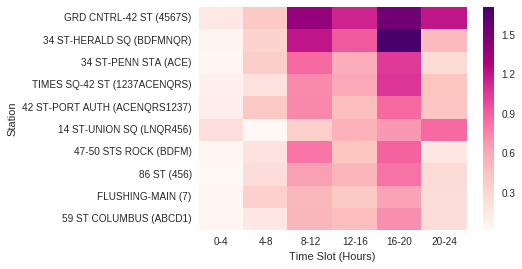

In [206]:
heatmap = sns.heatmap(stationbyhour_piv, cmap = 'RdPu', xticklabels=['0-4','4-8','8-12','12-16','16-20','20-24'],
                      yticklabels = sorted_stations)
plot = heatmap.get_figure()
plot.savefig('Fig3.png', bbox_inches='tight', dpi = 300)

In [203]:
sorted_stations = ['GRD CNTRL-42 ST (4567S)',
 '34 ST-HERALD SQ (BDFMNQR)',
 '34 ST-PENN STA (ACE)',
 'TIMES SQ-42 ST (1237ACENQRS)',
 '42 ST-PORT AUTH (ACENQRS1237)',
 '14 ST-UNION SQ (LNQR456)',
 '47-50 STS ROCK (BDFM)',
 '86 ST (456)',
 'FLUSHING-MAIN (7)',
 '59 ST COLUMBUS (ABCD1)']